In [1]:
# importing libraries

import os
import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Arima Model
from pmdarima.arima import auto_arima

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM

from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

# GARCH
from arch import arch_model

In [2]:
df = pd.read_csv("Netflix Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,7.931429,7.961429,7.565714,7.640000,17239600,0.0,0.0
1,2010-01-05 00:00:00-05:00,7.652857,7.657143,7.258571,7.358571,23753100,0.0,0.0
2,2010-01-06 00:00:00-05:00,7.361429,7.672857,7.197143,7.617143,23290400,0.0,0.0
3,2010-01-07 00:00:00-05:00,7.731429,7.757143,7.462857,7.485714,9955400,0.0,0.0
4,2010-01-08 00:00:00-05:00,7.498571,7.742857,7.465714,7.614286,8180900,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3522 non-null   object 
 1   Open          3522 non-null   float64
 2   High          3522 non-null   float64
 3   Low           3522 non-null   float64
 4   Close         3522 non-null   float64
 5   Volume        3522 non-null   int64  
 6   Dividends     3522 non-null   float64
 7   Stock Splits  3522 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 220.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3522 non-null   object 
 1   Open          3522 non-null   float64
 2   High          3522 non-null   float64
 3   Low           3522 non-null   float64
 4   Close         3522 non-null   float64
 5   Volume        3522 non-null   int64  
 6   Dividends     3522 non-null   float64
 7   Stock Splits  3522 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 220.3+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3522 non-null   datetime64[ns, UTC]
 1   Open          3522 non-null   float64            
 2   High          3522 non-null   float64            
 3   Low           3522 non-null   float64            
 4   Close         3522 non-null   float64            
 5   Volume        3522 non-null   int64              
 6   Dividends     3522 non-null   float64            
 7   Stock Splits  3522 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 220.3 KB


In [8]:
df['Date']

0      2010-01-04 05:00:00+00:00
1      2010-01-05 05:00:00+00:00
2      2010-01-06 05:00:00+00:00
3      2010-01-07 05:00:00+00:00
4      2010-01-08 05:00:00+00:00
                  ...           
3517   2023-12-22 05:00:00+00:00
3518   2023-12-26 05:00:00+00:00
3519   2023-12-27 05:00:00+00:00
3520   2023-12-28 05:00:00+00:00
3521   2023-12-29 05:00:00+00:00
Name: Date, Length: 3522, dtype: datetime64[ns, UTC]

In [9]:
df = df.set_index(df['Date']).sort_index()

In [10]:
df.sample(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-07-15 04:00:00+00:00,2021-07-15 04:00:00+00:00,553.969971,557.539978,538.200012,542.950012,5713900,0.0,0.0
2019-06-10 04:00:00+00:00,2019-06-10 04:00:00+00:00,363.649994,367.100006,349.290009,352.010010,7810300,0.0,0.0
2020-01-29 05:00:00+00:00,2020-01-29 05:00:00+00:00,349.000000,349.399994,338.549988,343.160004,7643500,0.0,0.0
2020-04-20 04:00:00+00:00,2020-04-20 04:00:00+00:00,435.170013,444.489990,430.559998,437.489990,12655800,0.0,0.0
2010-08-23 04:00:00+00:00,2010-08-23 04:00:00+00:00,18.642857,18.925714,18.071428,18.128571,26871600,0.0,0.0


In [11]:
df[df['Volume']==0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,


<Axes: xlabel='Date'>

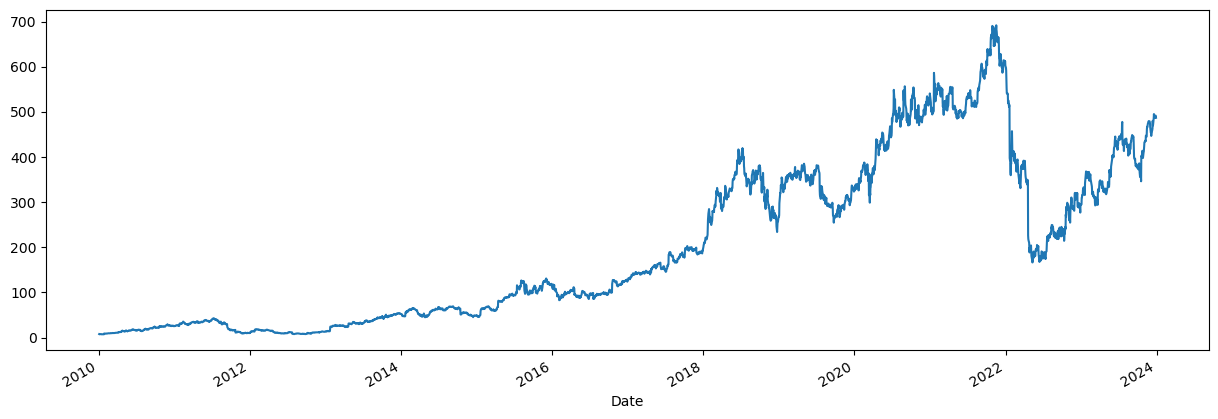

In [12]:
df['Close'].plot(figsize=(15,5))

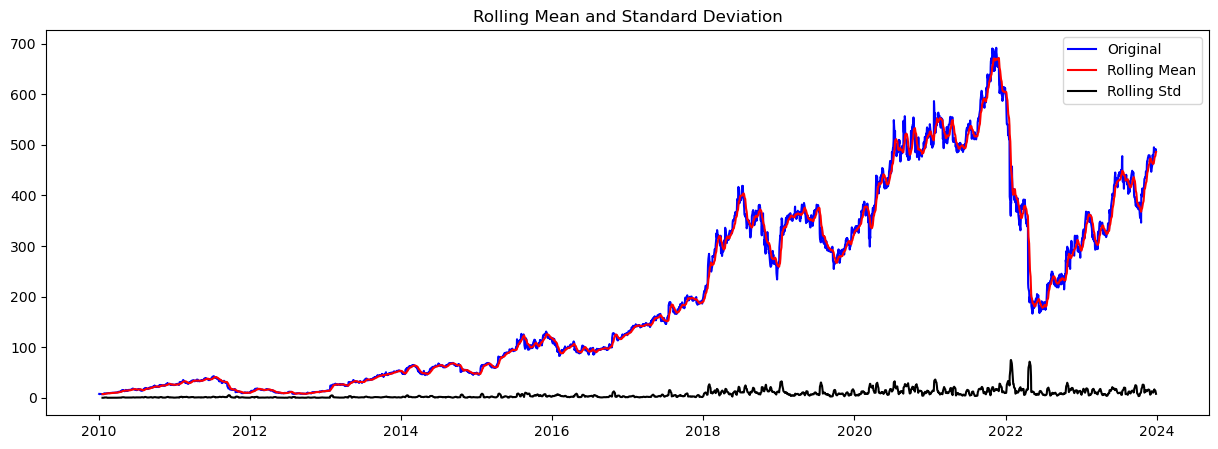

Results of dickey fuller test
Test Statistics                  -0.857117
p-value                           0.801766
No. of lags used                 29.000000
Number of observations used    3492.000000
dtype: float64


In [13]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(df['Close'])

## Differencing

In [14]:
df['Stocks First Difference']=df['Close']-df['Close'].shift(1)

<Axes: xlabel='Date'>

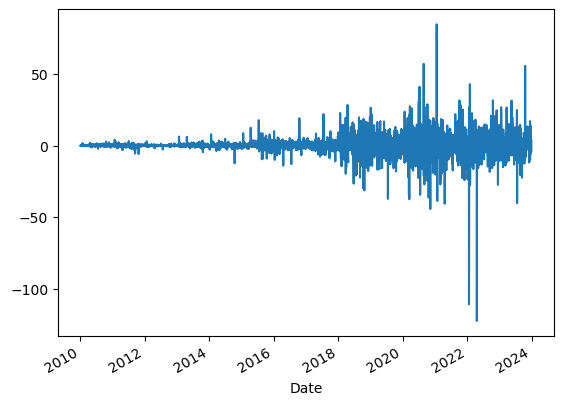

In [15]:
df['Stocks First Difference'].plot()

In [16]:
adft = adfuller(df['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -1.109797e+01
p-value                        3.930006e-20
No. of lags used               2.800000e+01
Number of observations used    3.492000e+03
dtype: float64


### ACF

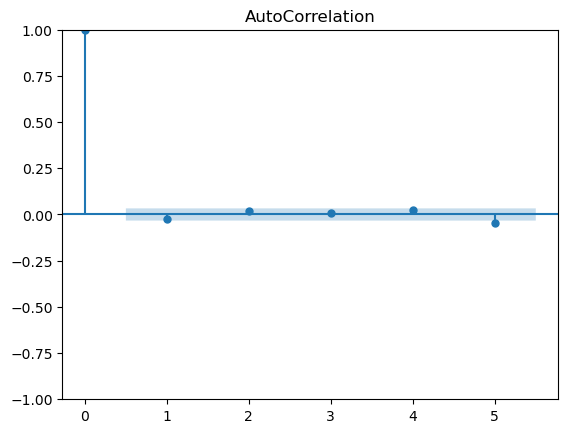

In [17]:
plot_acf(df["Stocks First Difference"].dropna(),lags=5,title="AutoCorrelation")
plt.show()

### PACF

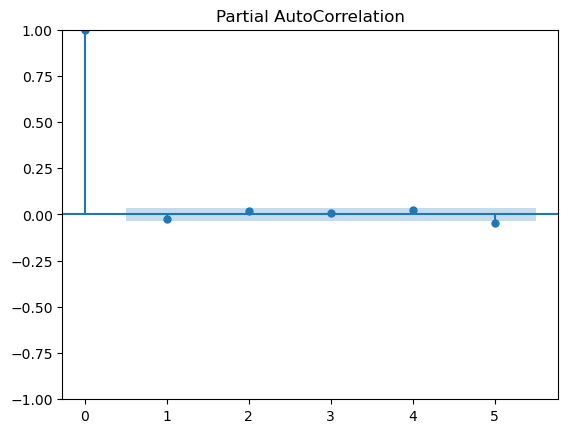

In [18]:
plot_pacf(df["Stocks First Difference"].dropna(),lags=5,title="Partial AutoCorrelation")
plt.show()

### Splitting the Data

*     **train**: Data from 2010 to 31st December, 2020.
*     **valid**: Data from 1st January, 2021 to 2023.


In [19]:
df_train = df[df.Date < "2021"]
df_valid = df[df.Date >= "2021"]
print(df_train.shape)
print(df_valid.shape)

(2769, 9)
(753, 9)


## Close Price ARIMA Model 

In [31]:
arima_train = df_train['Close'].values
arima_test = df_valid['Close'].values

In [ ]:
history = [x for x in arima_train]
predictions = list()

for t in range(len(df_valid)):
    arima_model = ARIMA(history, order=(1,1,1))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = arima_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=538.603131, expected=522.859985
predicted=525.789528, expected=520.799988
predicted=519.282801, expected=500.489990
predicted=503.314470, expected=508.890015
predicted=506.379389, expected=510.399994
predicted=511.763006, expected=499.100006
predicted=499.380769, expected=494.250000
predicted=494.545563, expected=507.790009
predicted=506.372256, expected=500.859985
predicted=502.355385, expected=497.980011
predicted=497.341575, expected=501.769989
predicted=501.805447, expected=586.340027
predicted=579.076908, expected=579.840027
predicted=585.197185, expected=565.169983
predicted=563.063663, expected=556.780029
predicted=558.936744, expected=561.929993
predicted=560.036091, expected=523.280029
predicted=527.938378, expected=538.599976


In [29]:
rmse_arima = sqrt(mean_squared_error(arima_test, predictions))
print('Test RMSE: %.3f' % rmse_arima)

Test RMSE: 11.731


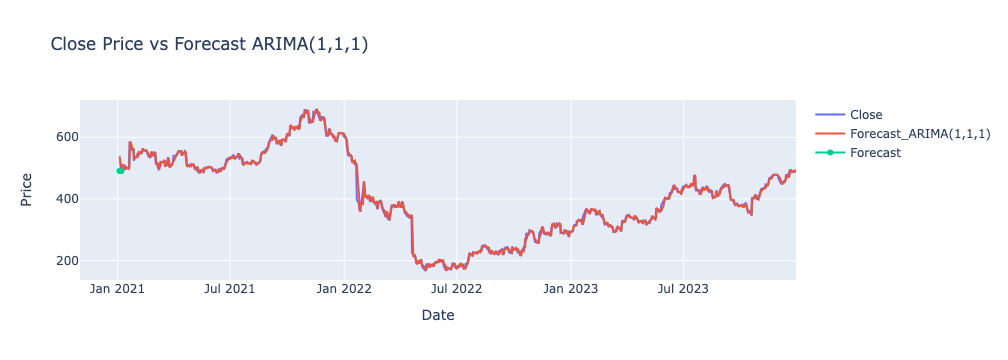

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predictions,name='Forecast_ARIMA(1,1,1)'))
fig.update_layout(
    title='Close Price vs Forecast ARIMA(1,1,1)',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

## Close Price LSTM Model

In [24]:
training_values = np.reshape(arima_train,(len(arima_train),1))
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
x_train = training_values[0:len(training_values)-1]
y_train = training_values[1:len(training_values)]
x_train = np.reshape(x_train,(len(x_train),1,1))

In [25]:
ltsm_model = Sequential()
ltsm_model.add(LSTM(128,return_sequences=True,input_shape=(None,1)))
ltsm_model.add(LSTM(64,return_sequences=False))
ltsm_model.add(Dense(25))
ltsm_model.add(Dense(1))

ltsm_model.compile(optimizer='adam',loss='mean_squared_error')

ltsm_model.fit(x_train,y_train,epochs=28,batch_size=8)

Epoch 1/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - loss: 0.0266
Epoch 2/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 1.4967e-04
Epoch 3/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 1.3642e-04
Epoch 4/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 1.6696e-04
Epoch 5/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 1.8047e-04
Epoch 6/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 1.7511e-04
Epoch 7/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 2.1559e-04
Epoch 8/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 1.3988e-04
Epoch 9/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 1.8723e-04
Epoch 10/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 1.7276e-04
Epoch 11/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 1.7891e-04
Epoch 12/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 1.8152e-04
Epoch 13/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 1.4865e-04
Epoch 14/28
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/s

In [26]:
test_values = np.reshape(arima_test, (len(arima_test), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = ltsm_model.predict(test_values)
predicted_price = scaler.inverse_transform(predicted_price) 
predicted_price=np.squeeze(predicted_price)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


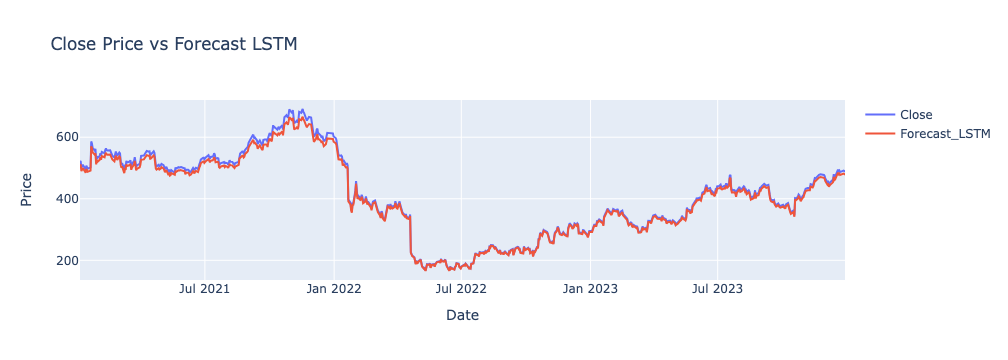

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_price,name='Forecast_LSTM'))
fig.update_layout(
    title='Close Price vs Forecast LSTM',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

In [28]:
rmse_lstm = sqrt(mean_squared_error(arima_test, predicted_price))
print('Test MSE: %.3f' % rmse_lstm)

Test MSE: 9.634


In [29]:
models = ['ARIMA','LSTM']
lst_acc = [rmse_arima,rmse_lstm]
MSE = pd.DataFrame({'Model': models, 'Root Mean Squared Error': lst_acc})
MSE.sort_values(by="Root Mean Squared Error")

,Model,Root Mean Squared Error
1,LSTM,9.634213
0,ARIMA,11.731414


## Combined Model

### Simple Average

In [30]:
combined_predictions = (predictions + predicted_price.flatten()) / 2

In [31]:
rmse_simple = sqrt(mean_squared_error(df_valid.Close, combined_predictions))
print('Test MSE: %.3f' % rmse_simple)

Test MSE: 7.662


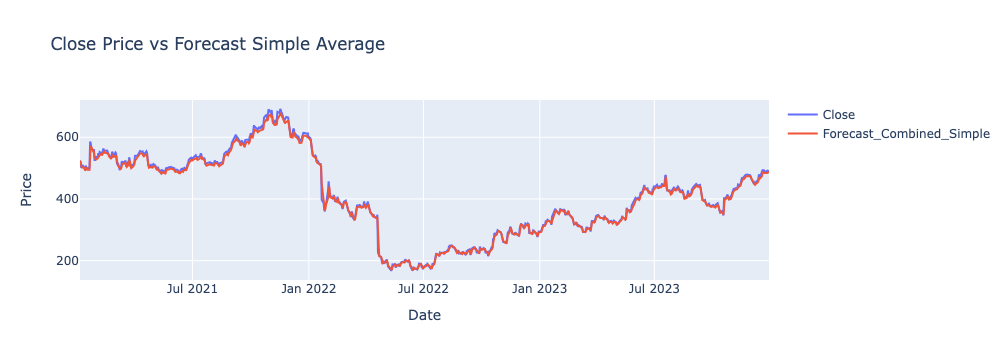

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=combined_predictions,name='Forecast_Combined_Simple'))
fig.update_layout(
    title='Close Price vs Forecast Simple Average',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

### Weighted Average

In [33]:
weight_arima = 0.4
weight_lstm = 0.6

In [34]:
arima_predictions = np.array(predictions)

In [35]:
combined_predictions = (weight_arima * arima_predictions) + (weight_lstm * predicted_price.flatten())

In [36]:
rmse_weighted = sqrt(mean_squared_error(df_valid.Close, combined_predictions))
print('Test MSE: %.3f' % rmse_weighted)

Test MSE: 7.516


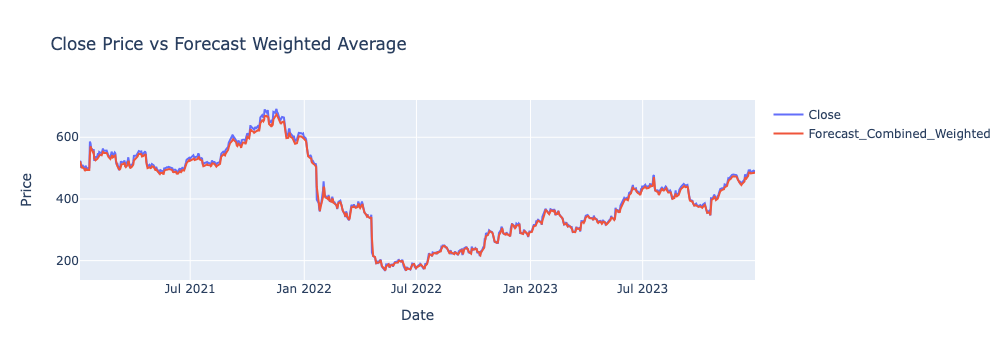

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=combined_predictions,name='Forecast_Combined_Weighted'))
fig.update_layout(
    title='Close Price vs Forecast Weighted Average',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

In [38]:
models = ['ARIMA','LSTM', 'Simple', 'Weighted']
lst_acc = [rmse_arima,rmse_lstm, rmse_simple, rmse_weighted]
MSE = pd.DataFrame({'Model': models, 'Root Mean Squared Error': lst_acc})
MSE.sort_values(by="Root Mean Squared Error")

,Model,Root Mean Squared Error
3,Weighted,7.516141
2,Simple,7.662436
1,LSTM,9.634213
0,ARIMA,11.731414
